#Data Mining Project

##Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
import scipy.stats
warnings.filterwarnings('ignore')

##Editing Data

In [ ]:
#We called our dataset and visualized it with the data.head() command.
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#We decided whether it is true or false by looking at the types in the data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#we looked for empty data, lost data.
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Values ​​like glucose,bloodpressure etc. can not be 0, we have to regulate them.
data.eq(0).sum()  

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
#Missing Data Imputation Using Regression


def ImputeZeroValuesWithRegression(dataset):

  columnsToBeImputed = ['Glucose','Insulin','SkinThickness','BMI']
  for column in columnsToBeImputed:

    test_df = dataset[dataset[column]==0]


    y_train= dataset[column]
    x_train= dataset.drop(column,axis=1)

    X_test = test_df.drop(column, axis=1)

    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(X_test)


    dataset.loc[dataset[column]==0,column] = y_pred

  return dataset
df=ImputeZeroValuesWithRegression(dataset=data)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.000000,140.472103,33.6,0.627,50,1
1,1,85.0,66,29.000000,65.823263,26.6,0.351,31,0
2,8,183.0,64,6.563747,96.262920,23.3,0.672,32,1
3,1,89.0,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70,27.000000,103.754985,36.8,0.340,27,0
765,5,121.0,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60,8.428455,12.303375,30.1,0.349,47,1


##Classification Task:Logistic Regression

In [ ]:
#creation of algorithms.
x=data[['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness',
       'Insulin', 'DiabetesPedigreeFunction']]
y=data.iloc[:,8]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=0)

In [ ]:
#log reg.
log_reg = LogisticRegression(random_state=1, max_iter=100).fit(x_train, y_train)
predict=log_reg.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#predict for Logistic Reg.
predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
print("Logistic Regression Classifier Training Accuracy: ",log_reg.score(x_test,y_test))

Logistic Regression Classifier Training Accuracy:  0.8831168831168831


##Classification Task:Random Forest

In [ ]:
#randomforest
forest=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=0)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#predict for forest classifier.
y_pred=forest.predict(x_test)
predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
print("Random Forest Classifier Training Accuracy: ",forest.score(x_test,y_test))

Random Forest Classifier Training Accuracy:  0.8311688311688312


##Classification Task:KNN Classifier

In [ ]:
#knn
KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
#predict for KNN.
y_pred=KNN.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[41 10]
 [14 12]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        51
           1       0.55      0.46      0.50        26

    accuracy                           0.69        77
   macro avg       0.65      0.63      0.64        77
weighted avg       0.68      0.69      0.68        77



In [ ]:
print("KNN classifier training accuracy: ",KNN.score(x_test,y_test))

KNN classifier training accuracy:  0.6883116883116883


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
import scipy.stats
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Correlation Analysis

In [ ]:
#The measure of the relationship between them.
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


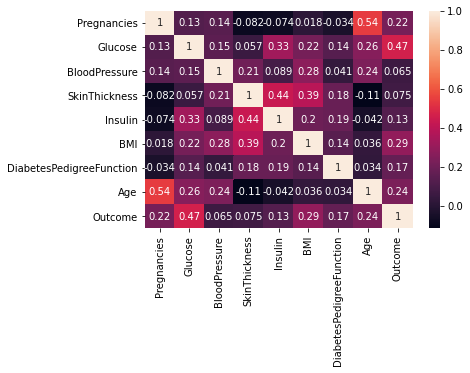

In [ ]:
#We tried to show each feature among itself.
sns.heatmap(data.corr(),annot=True)

##Compare Performance

In [ ]:
#performance
KNN_predict =[0 for _ in range(len(y_test)) ]
log_reg_predict=[0 for _ in range(len(y_test)) ]
forest_predict=[0 for _ in range(len(y_test)) ]

NameError: ignored

In [ ]:
model1=KNN.fit(x_train,y_train)
model2=log_reg.fit(x_train,y_train)
model3=forest.fit(x_train,y_train)

In [ ]:
KNN_predict=model1.predict_proba(x_test)
log_reg_predict=model2.predict_proba(x_test)
forest_predict=model3.predict_proba(x_test)

In [ ]:
KNN_predict=KNN_predict[:,1]
log_reg_predict=log_reg_predict[:,1]
forest_predict=forest_predict[:,1]

In [ ]:
KNN_auc=roc_auc_score(y_test,KNN_predict)
log_reg_auc=roc_auc_score(y_test,log_reg_predict)
forest_auc=roc_auc_score(y_test,forest_predict)

In [ ]:
print("KNN:ROC AUC=%.3f"%(KNN_auc))
print("log_reg:ROC AUC=%.3f"%(log_reg_auc))
print("forest:ROC AUC=%.3f"%(forest_auc))

In [ ]:
KNN_fpr,KNN_tpr,_=roc_curve(y_test,KNN_predict)
log_reg_fpr,log_reg_tpr,_=roc_curve(y_test,log_reg_predict)
forest_fpr,forest_tpr,_=roc_curve(y_test,forest_predict)

In [ ]:
pyplot.plot(KNN_fpr,KNN_tpr,linestyle="--",label="KNN")
pyplot.plot(log_reg_fpr,log_reg_tpr,marker=".",label="log_reg")
pyplot.plot(forest_fpr,forest_tpr,marker=".",label="forest")
pyplot.legend()
pyplot.show()

In [ ]:
#This is the most efficient analysis method, as the most area is under logistic regression.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
import scipy.stats
warnings.filterwarnings('ignore')


##Edit Data Cont.

In [ ]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Statistical data brought.
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Of the 768 patients, 500 are not sick.
data.shape

(768, 9)

In [ ]:
#we changed the values ​​of the table.
#NaN instead of 0
data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"
    ]]=data[[
    "Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,np.NaN) 
    

In [ ]:
#filling in the missing values
data.fillna(data.mean(),inplace=True)


In [ ]:
#we filled the empty spaces with average.
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


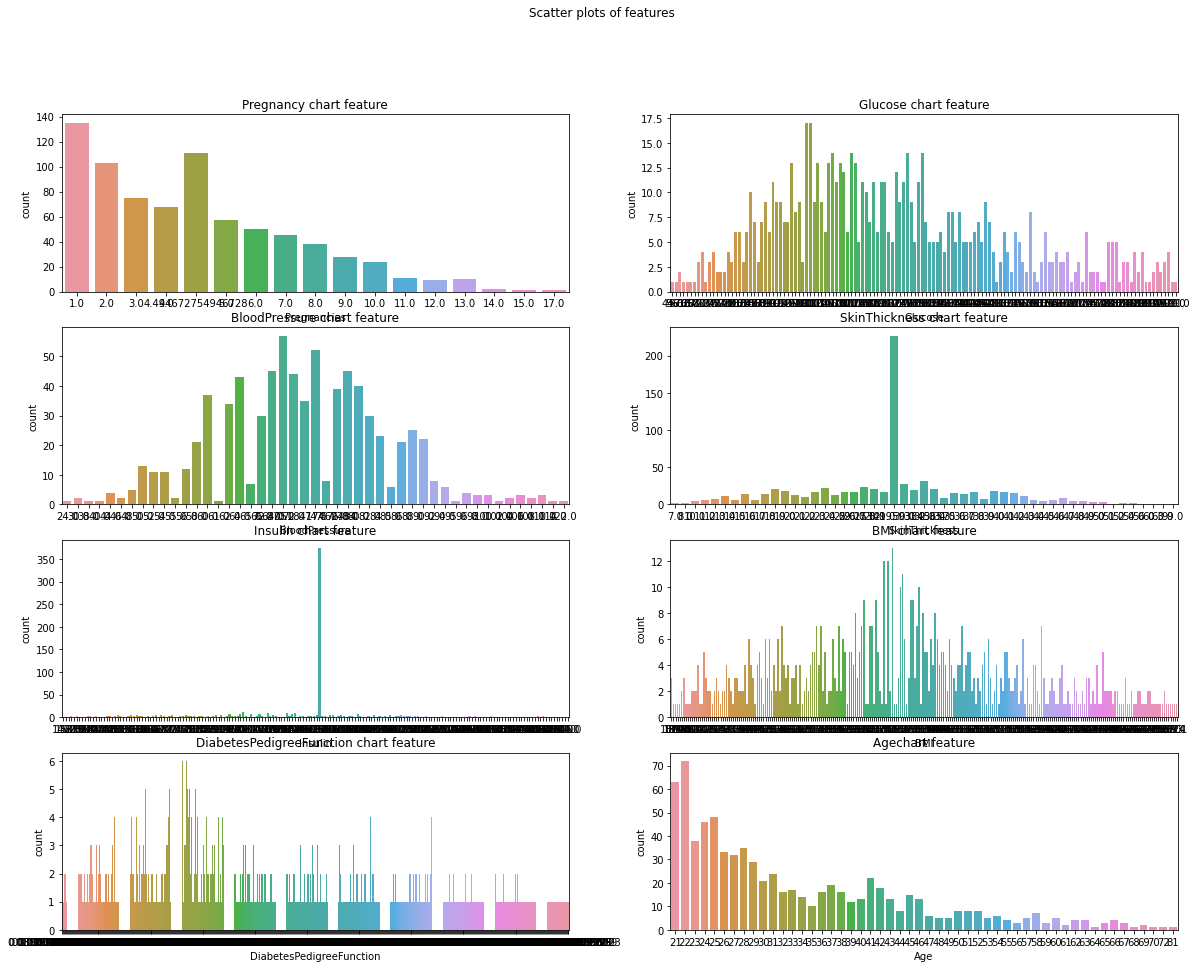

In [ ]:
#scatter plots of features
def scatter(ax,axis,name,title):
  sns.countplot(name,data=data,ax=ax[axis[0]][axis[1]])
  ax[axis[0],axis[1]].set_title(title)

f,ax=plt.subplots(4,2,figsize=(20,15))
plt.suptitle("Scatter plots of features")

features = (((0,0),"Pregnancies","Pregnancy chart feature"),((0,1),"Glucose","Glucose chart feature"),((1,0),"BloodPressure","BloodPressure chart feature"),((1,1),"SkinThickness","SkinThickness chart feature")
,((2,0),"Insulin","Insulin chart feature"),((2,1),"BMI","BMI chart feature"),((3,0),"DiabetesPedigreeFunction","DiabetesPedigreeFunction chart feature"),((3,1),"Age","Age" "chart feature"))

for axis, name, title in features:
  scatter(ax,axis,name,title)


[0.26153464 0.1581187  0.14611985 0.11221991 0.0936248  0.09605271
 0.13232938]


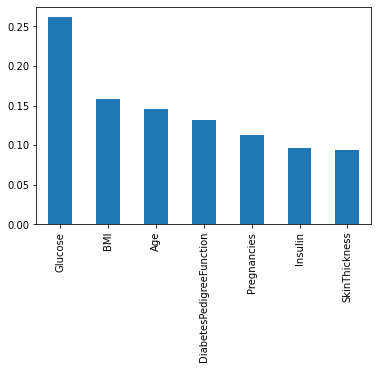

In [ ]:
#order of importance
x=data[['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness',
       'Insulin', 'DiabetesPedigreeFunction']]
y=data.iloc[:,8]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()

In [ ]:
#clustering
x=data[['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness',
       'Insulin', 'DiabetesPedigreeFunction']]
y=data.iloc[:,8]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=0)
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
kmeans.labels_
count = 0
for first,second in zip(y,kmeans.labels_):
  #print(first,second)
  if first==second:
      count+=1

print(count)
print("Accuracy: ",(count / len(y)) * 100)

503
Accuracy:  65.49479166666666
